In [ ]:
#!apt-get update -y

Hit:1 http://mirror.kakao.com/ubuntu focal InRelease
Hit:2 http://mirror.kakao.com/ubuntu focal-updates InRelease
Hit:3 http://mirror.kakao.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists... Done                        


In [ ]:
#!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import numpy as np

# 한글 폰트 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)
# 데이터 로드 (여기서는 예시 데이터를 사용합니다. 실제 데이터로 교체하세요.)
df = pd.read_csv('classified_train_processed.csv', encoding='utf-8')

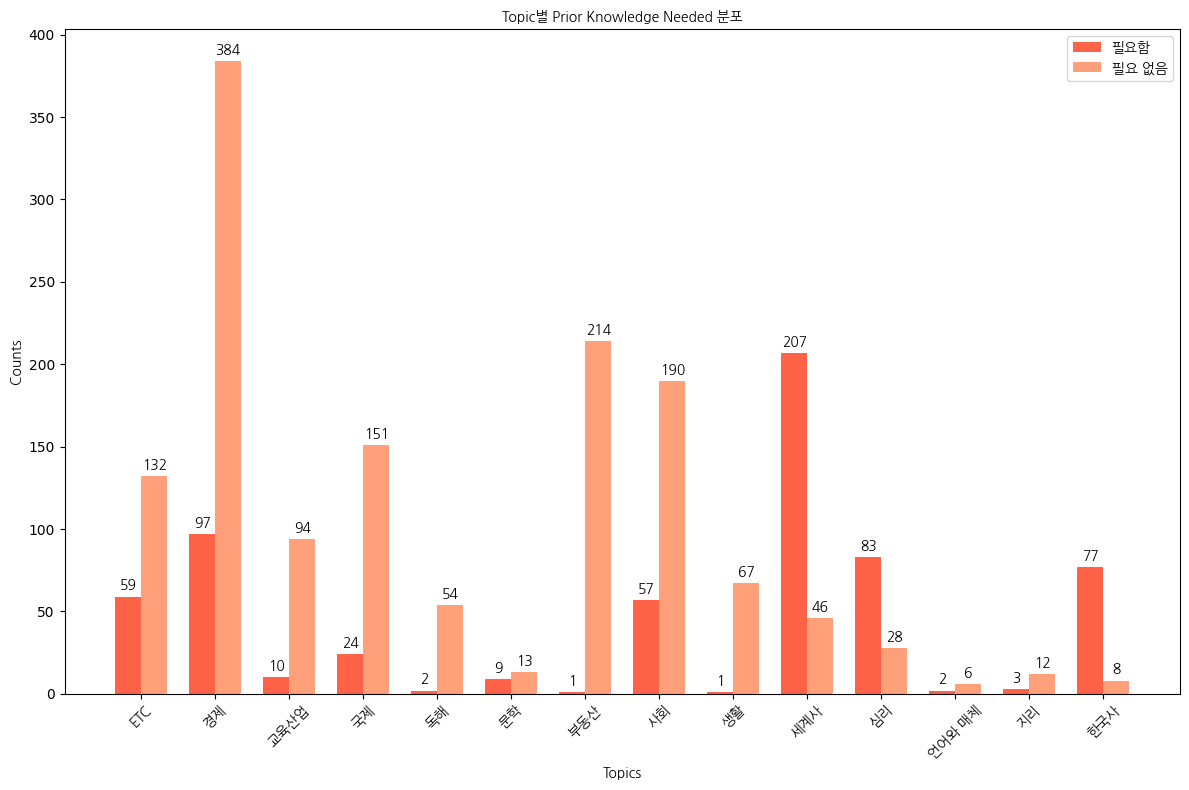

In [16]:
# 'topic'과 'prior_knowledge_needed'의 값 분포 확인
topic_prior_counts = df.groupby(['topic', 'prior_knowledge_needed']).size().unstack(fill_value=0)

# X축 위치 설정
topics = topic_prior_counts.index
x = np.arange(len(topics))  # 각 topic에 대한 위치

# 막대 너비 설정
bar_width = 0.35

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 8))

# '필요함'과 '필요 없음'에 대한 막대 그래프 그리기 (같은 계열 색상 사용: 빨간색과 핑크색)
bar1 = ax.bar(x - bar_width/2, topic_prior_counts['필요함'], bar_width, label='필요함', color='#FF6347')  # 토마토 색 (빨간색 계열)
bar2 = ax.bar(x + bar_width/2, topic_prior_counts['필요 없음'], bar_width, label='필요 없음', color='#FFA07A')  # 라이트 살몬 색 (핑크색 계열)

# 제목 및 레이블 설정
ax.set_title('Topic별 Prior Knowledge Needed 분포', fontproperties=fontprop)
ax.set_xlabel('Topics', fontproperties=fontprop)
ax.set_ylabel('Counts', fontproperties=fontprop)
ax.set_xticks(x)
ax.set_xticklabels(topics, rotation=45, fontproperties=fontprop)

# 범례 추가
ax.legend(prop=fontprop)

# 각 막대 위에 수치 표시 (주석 추가)
for rect in bar1:
    height = rect.get_height()
    ax.annotate(f'{height}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 약간 위로 이동
                textcoords="offset points",
                ha='center', va='bottom', fontproperties=fontprop)

for rect in bar2:
    height = rect.get_height()
    ax.annotate(f'{height}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 약간 위로 이동
                textcoords="offset points",
                ha='center', va='bottom', fontproperties=fontprop)

# 그래프 출력
plt.tight_layout()
plt.show()